In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [58]:
# n is used for realized sample size and dist_n is the n of simulated RV's

p = 0.65
n = 100000
dist_n = 200
bsamp = np.array([1 if random.random() <= p else 0 for i in range(n)])
brvs = np.array([[1 if random.random() <= p else 0 for i in range(n)] for j in range(dist_n)])

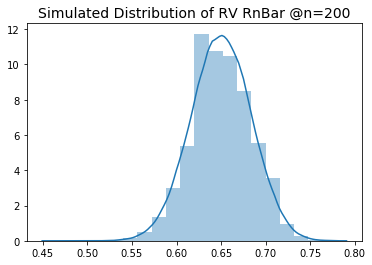

-------------------------------------------------
RnBar converges is roughly distributed N(p, p(1-p)/n)
(p * (1-p) / n ~= 0.0011)
-------------------------------------------------
               R     RnBar
mean      0.6500  0.649950
variance  0.2275  0.001141

-----------------------------------
RnBar converges in probability to p
-----------------------------------
estimated p: 0.65274


In [73]:
# Convergence of RnBar, the sample mean of a Bernoulli(p = 0.65)

rnbar_actual = np.mean(bsamp)
rnbar_dist = np.mean(brvs, axis=0)

plt.title('Simulated Distribution of RV RnBar @n=200', fontsize=14)
sns.distplot(rnbar_dist, bins=20)
plt.show()

print('-------------------------------------------------')
print('RnBar converges in distribution to N(0, p(1-p))')
print(f'(p * (1-p) / n ~= {round(p * (1 - p) / 200, 4)})')
print('-------------------------------------------------')
table = pd.DataFrame({'R': [p, p * (1 - p)], 'RnBar': [np.mean(rnbar_dist), np.var(rnbar_dist)]})
table.rename(index={0:'mean', 1:'variance'}, inplace=True)
print(table)

print('\n-----------------------------------')
print('RnBar converges in probability to p')
print('-----------------------------------')
print(f'estimated p: {rnbar_actual}')

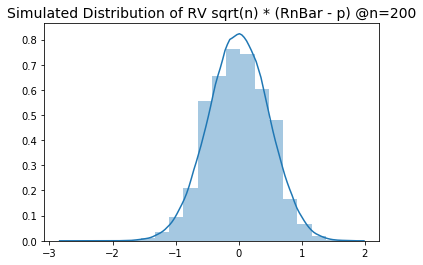

-------------------------------------------------
sqrt(n) * (RnBar - p) converges in distribution to N(0, p(1-p))
-------------------------------------------------
               R     RnBar
mean      0.6500 -0.000711
variance  0.2275  0.228179
0.2281787449875001
0.8664640788861249


In [74]:
# Convergence of sqrt(n) (RnBar - p)

rv = np.sqrt(dist_n) * (rnbar_dist - p)
actual = np.sqrt(n) * (rnbar_actual - p)

plt.title('Simulated Distribution of RV sqrt(n) * (RnBar - p) @n=200', fontsize=14)
sns.distplot(rv, bins=20)
plt.show()

print('-------------------------------------------------')
print('sqrt(n) * (RnBar - p) converges in distribution to N(0, p(1-p))')
print('-------------------------------------------------')
table = pd.DataFrame({'R': [p, p * (1 - p)], 'RnBar': [np.mean(rv), np.var(rv)]})
table.rename(index={0:'mean', 1:'variance'}, inplace=True)
print(table)
